In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import regex as re
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')
nltk.download('words')
words = set(nltk.corpus.words.words())
nltk.download('punkt');
# from nltk.sentiment.vader import SentimentIntensityAnalyz
import re
from wordcloud import WordCloud, STOPWORDS 
import requests

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/raphael/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to /Users/raphael/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /Users/raphael/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [122]:
df = pd.read_csv('Final Tweets.csv')

In [89]:
df.head()

,Unnamed: 0,Date,User,Tweet
0,0,2023-02-02 21:12:46+00:00,PulletsReprise,"@musiccitymark i will now state an affirmative case for ""united breaks guitars"""
1,1,2023-02-02 15:58:26+00:00,mananpuri04,"@sugandhabee @IndiGo6E Few years back, the didn't allow me to carry mine in the cabin. Marked fragile and checked-in, got it back in 2 pieces..\nThreatened them with creating a 'united breaks guitars' kind of a video. Got a refund!\n\nHence, be adamant about cabin or change airlines.."
2,2,2023-02-02 04:01:42+00:00,hey_cole_man,@barstoolsports Really wanting another United Breaks Guitars “mishap” after this
3,3,2023-01-31 19:05:33+00:00,noahsbwilliams,I played @DaveCarroll’s “United Breaks Guitars” to tell her the story of how United got bankrupted in the 2010s and now it’s stuck in my head 🤣
4,4,2023-01-31 04:24:19+00:00,MarsModeMusk,@enevah_lapon_17 United breaks guitars...\n\nNonetheless...\n\nUnited we stand.


<AxesSubplot:>

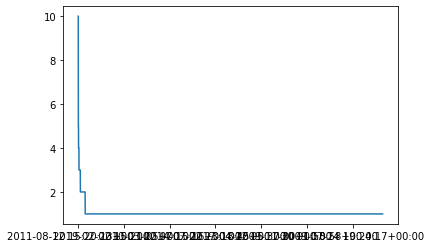

In [13]:
df['Date'].value_counts().plot()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34360 entries, 0 to 34359
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  34360 non-null  int64 
 1   Date        34360 non-null  object
 2   User        34359 non-null  object
 3   Tweet       34360 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


In [125]:
df['Date'] =  pd.to_datetime(df['Date'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34360 entries, 0 to 34359
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Unnamed: 0  34360 non-null  int64              
 1   Date        34360 non-null  datetime64[ns, UTC]
 2   User        34359 non-null  object             
 3   Tweet       34360 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 1.0+ MB


In [21]:
df.head()

,Unnamed: 0,Date,User,Tweet
0,0,2023-02-02 21:12:46+00:00,PulletsReprise,"@musiccitymark i will now state an affirmative case for ""united breaks guitars"""
1,1,2023-02-02 15:58:26+00:00,mananpuri04,"@sugandhabee @IndiGo6E Few years back, the didn't allow me to carry mine in the cabin. Marked fragile and checked-in, got it back in 2 pieces..\nThreatened them with creating a 'united breaks guitars' kind of a video. Got a refund!\n\nHence, be adamant about cabin or change airlines.."
2,2,2023-02-02 04:01:42+00:00,hey_cole_man,@barstoolsports Really wanting another United Breaks Guitars “mishap” after this
3,3,2023-01-31 19:05:33+00:00,noahsbwilliams,I played @DaveCarroll’s “United Breaks Guitars” to tell her the story of how United got bankrupted in the 2010s and now it’s stuck in my head 🤣
4,4,2023-01-31 04:24:19+00:00,MarsModeMusk,@enevah_lapon_17 United breaks guitars...\n\nNonetheless...\n\nUnited we stand.


In [22]:
df['Date'].value_counts()

2011-08-12 15:20:13+00:00    10
2011-02-17 19:23:27+00:00     7
2012-02-07 09:58:45+00:00     7
2012-02-06 21:58:49+00:00     6
2011-02-17 19:35:28+00:00     6
2012-02-02 18:29:36+00:00     5
2012-02-08 08:58:23+00:00     5
2012-02-08 09:36:04+00:00     5
2012-02-08 08:58:25+00:00     5
2009-08-21 17:16:09+00:00     5
2012-02-08 08:58:49+00:00     5
2012-02-07 09:58:41+00:00     5
2009-10-29 20:19:32+00:00     5
2012-02-07 09:59:36+00:00     5
2012-02-08 09:27:14+00:00     5
2012-02-07 09:58:57+00:00     5
2012-02-06 21:59:05+00:00     5
2010-05-21 18:16:22+00:00     5
2009-10-29 20:19:06+00:00     5
2012-02-07 09:58:44+00:00     5
2009-08-21 17:16:12+00:00     5
2012-02-02 18:31:36+00:00     5
2012-02-07 09:59:31+00:00     5
2012-02-07 09:59:35+00:00     4
2009-08-21 17:16:15+00:00     4
2009-08-21 17:16:13+00:00     4
2009-08-21 17:16:16+00:00     4
2012-02-07 09:58:50+00:00     4
2012-02-02 18:29:40+00:00     4
2012-02-02 18:38:45+00:00     4
2009-08-21 17:16:14+00:00     4
2012-02-

In [123]:
df['Dates'] = pd.to_datetime(df['Date']).dt.date
df['Time'] = pd.to_datetime(df['Date']).dt.time

In [25]:
df.head()

,Unnamed: 0,Date,User,Tweet,Dates,Time
0,0,2023-02-02 21:12:46+00:00,PulletsReprise,"@musiccitymark i will now state an affirmative case for ""united breaks guitars""",2023-02-02,21:12:46
1,1,2023-02-02 15:58:26+00:00,mananpuri04,"@sugandhabee @IndiGo6E Few years back, the didn't allow me to carry mine in the cabin. Marked fragile and checked-in, got it back in 2 pieces..\nThreatened them with creating a 'united breaks guitars' kind of a video. Got a refund!\n\nHence, be adamant about cabin or change airlines..",2023-02-02,15:58:26
2,2,2023-02-02 04:01:42+00:00,hey_cole_man,@barstoolsports Really wanting another United Breaks Guitars “mishap” after this,2023-02-02,04:01:42
3,3,2023-01-31 19:05:33+00:00,noahsbwilliams,I played @DaveCarroll’s “United Breaks Guitars” to tell her the story of how United got bankrupted in the 2010s and now it’s stuck in my head 🤣,2023-01-31,19:05:33
4,4,2023-01-31 04:24:19+00:00,MarsModeMusk,@enevah_lapon_17 United breaks guitars...\n\nNonetheless...\n\nUnited we stand.,2023-01-31,04:24:19


In [27]:
df['Dates'].value_counts()/len(df.Dates)*100

2009-07-09    3.306170
2009-07-08    2.616414
2009-07-10    2.561118
2017-04-11    2.500000
2009-08-19    2.223516
2012-02-02    1.850990
2009-07-15    1.580326
2017-04-10    1.536671
2009-08-18    1.266007
2009-10-29    1.216531
2009-07-11    1.135041
2012-02-07    1.036088
2017-04-12    0.916764
2009-07-13    0.867288
2012-02-08    0.823632
2009-07-23    0.710128
2009-08-21    0.704307
2009-07-14    0.681024
2009-07-16    0.654831
2012-02-06    0.637369
2009-07-17    0.619907
2009-07-07    0.619907
2009-07-12    0.616997
2010-03-03    0.593714
2009-10-30    0.535506
2009-07-24    0.486030
2012-02-03    0.459837
2017-04-13    0.419092
2009-08-20    0.413271
2009-07-27    0.325960
2009-07-25    0.299767
2013-04-28    0.296857
2010-03-02    0.256112
2009-08-24    0.238650
2009-07-21    0.232829
2009-07-19    0.218277
2010-03-04    0.212456
2018-03-14    0.206636
2009-07-22    0.206636
2010-07-26    0.206636
2009-07-20    0.206636
2009-07-30    0.203725
2017-04-14    0.197905
2009-07-18 

In [126]:
# Create new columns
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34360 entries, 0 to 34359
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Unnamed: 0  34360 non-null  int64              
 1   Date        34360 non-null  datetime64[ns, UTC]
 2   User        34359 non-null  object             
 3   Tweet       34360 non-null  object             
 4   Dates       34360 non-null  object             
 5   Time        34360 non-null  object             
 6   day         34360 non-null  int64              
 7   month       34360 non-null  int64              
 8   year        34360 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(4)
memory usage: 2.4+ MB


In [36]:
df['year'].value_counts()/len(df.Dates)*100

2009    32.077998
2012    14.834109
2017    10.881839
2010    10.066938
2011     8.472061
2013     6.298021
2014     3.975553
2015     3.533178
2016     2.782305
2018     2.322468
2019     1.580326
2022     1.318393
2021     0.864377
2020     0.832363
2023     0.157159
2008     0.002910
Name: year, dtype: float64

<AxesSubplot:>

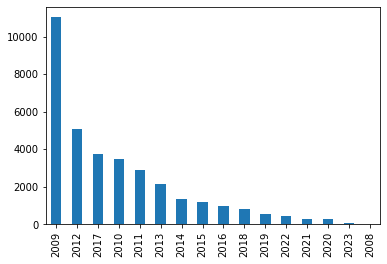

In [43]:
df['year'].value_counts().plot.bar()

In [87]:
df.head()

,Unnamed: 0,Date,User,Tweet,Dates,Time,day,month,year,Tweet_cleaned,Tweet
0,0,2023-02-02 21:12:46+00:00,PulletsReprise,"@musiccitymark i will now state an affirmative case for ""united breaks guitars""",2023-02-02,21:12:46,2,2,2023,"i will now state an affirmative case for "" united """,[]
1,1,2023-02-02 15:58:26+00:00,mananpuri04,"@sugandhabee @IndiGo6E Few years back, the didn't allow me to carry mine in the cabin. Marked fragile and checked-in, got it back in 2 pieces..\nThreatened them with creating a 'united breaks guitars' kind of a video. Got a refund!\n\nHence, be adamant about cabin or change airlines..",2023-02-02,15:58:26,2,2,2023,"Few back , the ' t allow me to carry mine in the cabin . Marked fragile and checked - in , got it back in 2 .. them with a ' united ' kind of a video . Got a refund ! Hence , be adamant about cabin or change ..",[]
2,2,2023-02-02 04:01:42+00:00,hey_cole_man,@barstoolsports Really wanting another United Breaks Guitars “mishap” after this,2023-02-02,04:01:42,2,2,2023,Really wanting another United “ mishap ” after this,[]
3,3,2023-01-31 19:05:33+00:00,noahsbwilliams,I played @DaveCarroll’s “United Breaks Guitars” to tell her the story of how United got bankrupted in the 2010s and now it’s stuck in my head 🤣,2023-01-31,19:05:33,31,1,2023,I ’ s “ United ” to tell her the story of how United got in the 2010s and now it ’ s stuck in my head 🤣,[]
4,4,2023-01-31 04:24:19+00:00,MarsModeMusk,@enevah_lapon_17 United breaks guitars...\n\nNonetheless...\n\nUnited we stand.,2023-01-31,04:24:19,31,1,2023,lapon 17 United ... Nonetheless ... United we stand .,[]


In [129]:
df['Hashtags'] = df['Tweet'].str.findall(r'#.*?(?=\s|$)')

In [130]:
df.head()

,Unnamed: 0,Date,User,Tweet,Dates,Time,day,month,year,Hashtags
0,0,2023-02-02 21:12:46+00:00,PulletsReprise,"@musiccitymark i will now state an affirmative case for ""united breaks guitars""",2023-02-02,21:12:46,2,2,2023,[]
1,1,2023-02-02 15:58:26+00:00,mananpuri04,"@sugandhabee @IndiGo6E Few years back, the didn't allow me to carry mine in the cabin. Marked fragile and checked-in, got it back in 2 pieces..\nThreatened them with creating a 'united breaks guitars' kind of a video. Got a refund!\n\nHence, be adamant about cabin or change airlines..",2023-02-02,15:58:26,2,2,2023,[]
2,2,2023-02-02 04:01:42+00:00,hey_cole_man,@barstoolsports Really wanting another United Breaks Guitars “mishap” after this,2023-02-02,04:01:42,2,2,2023,[]
3,3,2023-01-31 19:05:33+00:00,noahsbwilliams,I played @DaveCarroll’s “United Breaks Guitars” to tell her the story of how United got bankrupted in the 2010s and now it’s stuck in my head 🤣,2023-01-31,19:05:33,31,1,2023,[]
4,4,2023-01-31 04:24:19+00:00,MarsModeMusk,@enevah_lapon_17 United breaks guitars...\n\nNonetheless...\n\nUnited we stand.,2023-01-31,04:24:19,31,1,2023,[]


In [131]:
df['mentions'] = df['Tweet'].str.findall(r'[＠@]([^][\s#<>|{}]+)')

In [110]:
df.head(20)

,Unnamed: 0,Date,User,Tweet,Hashtags,mentions
0,0,2023-02-02 21:12:46+00:00,PulletsReprise,"@musiccitymark i will now state an affirmative case for ""united breaks guitars""",[],[musiccitymark]
1,1,2023-02-02 15:58:26+00:00,mananpuri04,"@sugandhabee @IndiGo6E Few years back, the didn't allow me to carry mine in the cabin. Marked fragile and checked-in, got it back in 2 pieces..\nThreatened them with creating a 'united breaks guitars' kind of a video. Got a refund!\n\nHence, be adamant about cabin or change airlines..",[],"[sugandhabee, IndiGo6E]"
2,2,2023-02-02 04:01:42+00:00,hey_cole_man,@barstoolsports Really wanting another United Breaks Guitars “mishap” after this,[],[barstoolsports]
3,3,2023-01-31 19:05:33+00:00,noahsbwilliams,I played @DaveCarroll’s “United Breaks Guitars” to tell her the story of how United got bankrupted in the 2010s and now it’s stuck in my head 🤣,[],[DaveCarroll’s]
4,4,2023-01-31 04:24:19+00:00,MarsModeMusk,@enevah_lapon_17 United breaks guitars...\n\nNonetheless...\n\nUnited we stand.,[],[enevah_lapon_17]
5,5,2023-01-30 22:57:32+00:00,holtz_oxley,"@wendellkmusic I have seen the ""United Breaks Guitars"" and can understand your concern",[],[wendellkmusic]
6,6,2023-01-27 17:23:23+00:00,realdirkg,@KurtSchlichter @united United Breaks Guitars,[],"[KurtSchlichter, united]"
7,7,2023-01-24 00:42:15+00:00,FenleyCooper,Song #2 United Breaks Guitars ROFLOL! https://t.co/1d1l0sTDRE,[#2],[]
8,8,2023-01-23 17:23:26+00:00,yofiddlinmama,"After getting such a run around about a flight United rerouted at the last second, it’s time to bring this back out. United Breaks Guitars https://t.co/WmUpoqctFI via @YouTube",[],[YouTube]
9,9,2023-01-22 22:45:41+00:00,RrnRaindeer,@KLVeritas @btysonmd United breaks guitars.,[],"[KLVeritas, btysonmd]"


In [133]:
def remove_hashtags_usernames(tweet):
    # Use regex to match hashtags (starting with #) and usernames (starting with @)
    tweet = re.sub(r'#\w+', '', tweet)
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r"http\S+", "", tweet)
    return tweet

cleaned_tweets = []
for tweet in df['Tweet']:
    cleaned_tweet = remove_hashtags_usernames(tweet)
    cleaned_tweets.append(cleaned_tweet)



In [134]:
df['cleaned_tweets'] = cleaned_tweets

In [135]:
df.head()

,Unnamed: 0,Date,User,Tweet,Dates,Time,day,month,year,Hashtags,mentions,cleaned_tweets
0,0,2023-02-02 21:12:46+00:00,PulletsReprise,"@musiccitymark i will now state an affirmative case for ""united breaks guitars""",2023-02-02,21:12:46,2,2,2023,[],[musiccitymark],"i will now state an affirmative case for ""united breaks guitars"""
1,1,2023-02-02 15:58:26+00:00,mananpuri04,"@sugandhabee @IndiGo6E Few years back, the didn't allow me to carry mine in the cabin. Marked fragile and checked-in, got it back in 2 pieces..\nThreatened them with creating a 'united breaks guitars' kind of a video. Got a refund!\n\nHence, be adamant about cabin or change airlines..",2023-02-02,15:58:26,2,2,2023,[],"[sugandhabee, IndiGo6E]","Few years back, the didn't allow me to carry mine in the cabin. Marked fragile and checked-in, got it back in 2 pieces..\nThreatened them with creating a 'united breaks guitars' kind of a video. Got a refund!\n\nHence, be adamant about cabin or change airlines.."
2,2,2023-02-02 04:01:42+00:00,hey_cole_man,@barstoolsports Really wanting another United Breaks Guitars “mishap” after this,2023-02-02,04:01:42,2,2,2023,[],[barstoolsports],Really wanting another United Breaks Guitars “mishap” after this
3,3,2023-01-31 19:05:33+00:00,noahsbwilliams,I played @DaveCarroll’s “United Breaks Guitars” to tell her the story of how United got bankrupted in the 2010s and now it’s stuck in my head 🤣,2023-01-31,19:05:33,31,1,2023,[],[DaveCarroll’s],I played ’s “United Breaks Guitars” to tell her the story of how United got bankrupted in the 2010s and now it’s stuck in my head 🤣
4,4,2023-01-31 04:24:19+00:00,MarsModeMusk,@enevah_lapon_17 United breaks guitars...\n\nNonetheless...\n\nUnited we stand.,2023-01-31,04:24:19,31,1,2023,[],[enevah_lapon_17],United breaks guitars...\n\nNonetheless...\n\nUnited we stand.


In [142]:
comment_words = '' 
add_stop = ['https', 'rt']
stopwords = set(list(STOPWORDS)+add_stop)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'https',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',

In [143]:
for val in df['cleaned_tweets']: 
      
    val = str(val) 
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

In [144]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

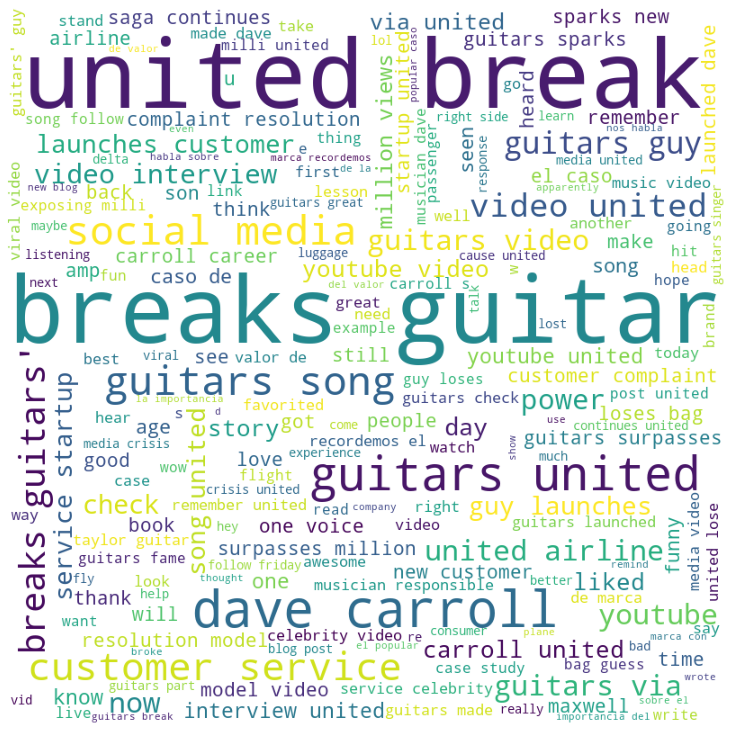

In [145]:
plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [146]:
# Define the sentiment objects using TextBlob

sentiment_objects = [TextBlob(tweet) for tweet in df['cleaned_tweets']]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.6,
 TextBlob(" i will now state an affirmative case for "united breaks guitars""))

In [147]:
# Create a list of polarity values and tweet text

sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

# Print the value of the 0th row.

sentiment_values[0]
# Print all the sentiment values

sentiment_values[0:99]


[[0.6, ' i will now state an affirmative case for "united breaks guitars"'],
 [0.10714285714285714,
  "  Few years back, the didn't allow me to carry mine in the cabin. Marked fragile and checked-in, got it back in 2 pieces..\nThreatened them with creating a 'united breaks guitars' kind of a video. Got a refund!\n\nHence, be adamant about cabin or change airlines.."],
 [0.2, ' Really wanting another United Breaks Guitars “mishap” after this'],
 [0.0,
  'I played ’s “United Breaks Guitars” to tell her the story of how United got bankrupted in the 2010s and now it’s stuck in my head 🤣'],
 [0.0, ' United breaks guitars...\n\nNonetheless...\n\nUnited we stand.'],
 [0.0,
  ' I have seen the "United Breaks Guitars" and can understand your concern'],
 [0.0, '  United Breaks Guitars'],
 [0.0, 'Song  United Breaks Guitars ROFLOL! '],
 [0.0,
  'After getting such a run around about a flight United rerouted at the last second, it’s time to bring this back out. United Breaks Guitars  via '],
 [0.0

In [148]:
# Create a dataframe of each tweet against its polarity


sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])
sentiment_df
df['polarity'] = sentiment_df['polarity']

In [149]:
df.head()

,Unnamed: 0,Date,User,Tweet,Dates,Time,day,month,year,Hashtags,mentions,cleaned_tweets,polarity
0,0,2023-02-02 21:12:46+00:00,PulletsReprise,"@musiccitymark i will now state an affirmative case for ""united breaks guitars""",2023-02-02,21:12:46,2,2,2023,[],[musiccitymark],"i will now state an affirmative case for ""united breaks guitars""",0.600000
1,1,2023-02-02 15:58:26+00:00,mananpuri04,"@sugandhabee @IndiGo6E Few years back, the didn't allow me to carry mine in the cabin. Marked fragile and checked-in, got it back in 2 pieces..\nThreatened them with creating a 'united breaks guitars' kind of a video. Got a refund!\n\nHence, be adamant about cabin or change airlines..",2023-02-02,15:58:26,2,2,2023,[],"[sugandhabee, IndiGo6E]","Few years back, the didn't allow me to carry mine in the cabin. Marked fragile and checked-in, got it back in 2 pieces..\nThreatened them with creating a 'united breaks guitars' kind of a video. Got a refund!\n\nHence, be adamant about cabin or change airlines..",0.107143
2,2,2023-02-02 04:01:42+00:00,hey_cole_man,@barstoolsports Really wanting another United Breaks Guitars “mishap” after this,2023-02-02,04:01:42,2,2,2023,[],[barstoolsports],Really wanting another United Breaks Guitars “mishap” after this,0.200000
3,3,2023-01-31 19:05:33+00:00,noahsbwilliams,I played @DaveCarroll’s “United Breaks Guitars” to tell her the story of how United got bankrupted in the 2010s and now it’s stuck in my head 🤣,2023-01-31,19:05:33,31,1,2023,[],[DaveCarroll’s],I played ’s “United Breaks Guitars” to tell her the story of how United got bankrupted in the 2010s and now it’s stuck in my head 🤣,0.000000
4,4,2023-01-31 04:24:19+00:00,MarsModeMusk,@enevah_lapon_17 United breaks guitars...\n\nNonetheless...\n\nUnited we stand.,2023-01-31,04:24:19,31,1,2023,[],[enevah_lapon_17],United breaks guitars...\n\nNonetheless...\n\nUnited we stand.,0.000000


In [150]:
# Save the polarity column as 'n'.

n=sentiment_df["polarity"]

# Convert this column into a series, 'm'. 

m=pd.Series(n)

m

0        6.000000e-01
1        1.071429e-01
2        2.000000e-01
3        0.000000e+00
4        0.000000e+00
5        0.000000e+00
6        0.000000e+00
7        0.000000e+00
8        0.000000e+00
9        0.000000e+00
10       0.000000e+00
11      -4.966667e-02
12       0.000000e+00
13       0.000000e+00
14       2.500000e-01
15       0.000000e+00
16       0.000000e+00
17       0.000000e+00
18       0.000000e+00
19       0.000000e+00
20       0.000000e+00
21       0.000000e+00
22       8.888889e-02
23      -2.000000e-01
24       0.000000e+00
25       0.000000e+00
26       0.000000e+00
27       5.000000e-01
28       0.000000e+00
29       0.000000e+00
30       0.000000e+00
31       1.481481e-02
32       0.000000e+00
33      -5.000000e-01
34       0.000000e+00
35       1.000000e-01
36       0.000000e+00
37       1.178571e-01
38       6.666667e-02
39       0.000000e+00
40      -6.666667e-02
41       0.000000e+00
42       1.477273e-02
43       5.681818e-03
44       1.000000e+00
45       0

In [152]:
# Initialize variables, 'pos', 'neg', 'neu'.

pos=0
neg=0
neu=0

sentiment = []
# Create a loop to classify the tweets as Positive, Negative, or Neutral.
# Count the number of each.

for items in m:
    if items>0:
        sentiment.append("Positive")
        pos=pos+1
    elif items<0:
        sentiment.append("Negative")
        neg=neg+1
    else:
        sentiment.append("Neutral")
        neu=neu+1
        
print(pos,neg,neu)

11732 3658 18970


In [153]:
df['Sentiment'] = sentiment

In [154]:
df.head()

,Unnamed: 0,Date,User,Tweet,Dates,Time,day,month,year,Hashtags,mentions,cleaned_tweets,polarity,Sentiment
0,0,2023-02-02 21:12:46+00:00,PulletsReprise,"@musiccitymark i will now state an affirmative case for ""united breaks guitars""",2023-02-02,21:12:46,2,2,2023,[],[musiccitymark],"i will now state an affirmative case for ""united breaks guitars""",0.600000,Positive
1,1,2023-02-02 15:58:26+00:00,mananpuri04,"@sugandhabee @IndiGo6E Few years back, the didn't allow me to carry mine in the cabin. Marked fragile and checked-in, got it back in 2 pieces..\nThreatened them with creating a 'united breaks guitars' kind of a video. Got a refund!\n\nHence, be adamant about cabin or change airlines..",2023-02-02,15:58:26,2,2,2023,[],"[sugandhabee, IndiGo6E]","Few years back, the didn't allow me to carry mine in the cabin. Marked fragile and checked-in, got it back in 2 pieces..\nThreatened them with creating a 'united breaks guitars' kind of a video. Got a refund!\n\nHence, be adamant about cabin or change airlines..",0.107143,Positive
2,2,2023-02-02 04:01:42+00:00,hey_cole_man,@barstoolsports Really wanting another United Breaks Guitars “mishap” after this,2023-02-02,04:01:42,2,2,2023,[],[barstoolsports],Really wanting another United Breaks Guitars “mishap” after this,0.200000,Positive
3,3,2023-01-31 19:05:33+00:00,noahsbwilliams,I played @DaveCarroll’s “United Breaks Guitars” to tell her the story of how United got bankrupted in the 2010s and now it’s stuck in my head 🤣,2023-01-31,19:05:33,31,1,2023,[],[DaveCarroll’s],I played ’s “United Breaks Guitars” to tell her the story of how United got bankrupted in the 2010s and now it’s stuck in my head 🤣,0.000000,Neutral
4,4,2023-01-31 04:24:19+00:00,MarsModeMusk,@enevah_lapon_17 United breaks guitars...\n\nNonetheless...\n\nUnited we stand.,2023-01-31,04:24:19,31,1,2023,[],[enevah_lapon_17],United breaks guitars...\n\nNonetheless...\n\nUnited we stand.,0.000000,Neutral
